In [9]:
import pandas as pd
from DataCleaning import GetData
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = GetData()

In [4]:
dfraw = Data.raw_data

## Outliers

/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_4826/55527551.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfraw[column], label=column, shade=True)
/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_4826/55527551.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfraw[column], label=column, shade=True)
/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_4826/55527551.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfraw[column], label=column, shade=True)
/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_4826/55527551.py:9: FutureWarning: 

`shade` is now deprecated in favor

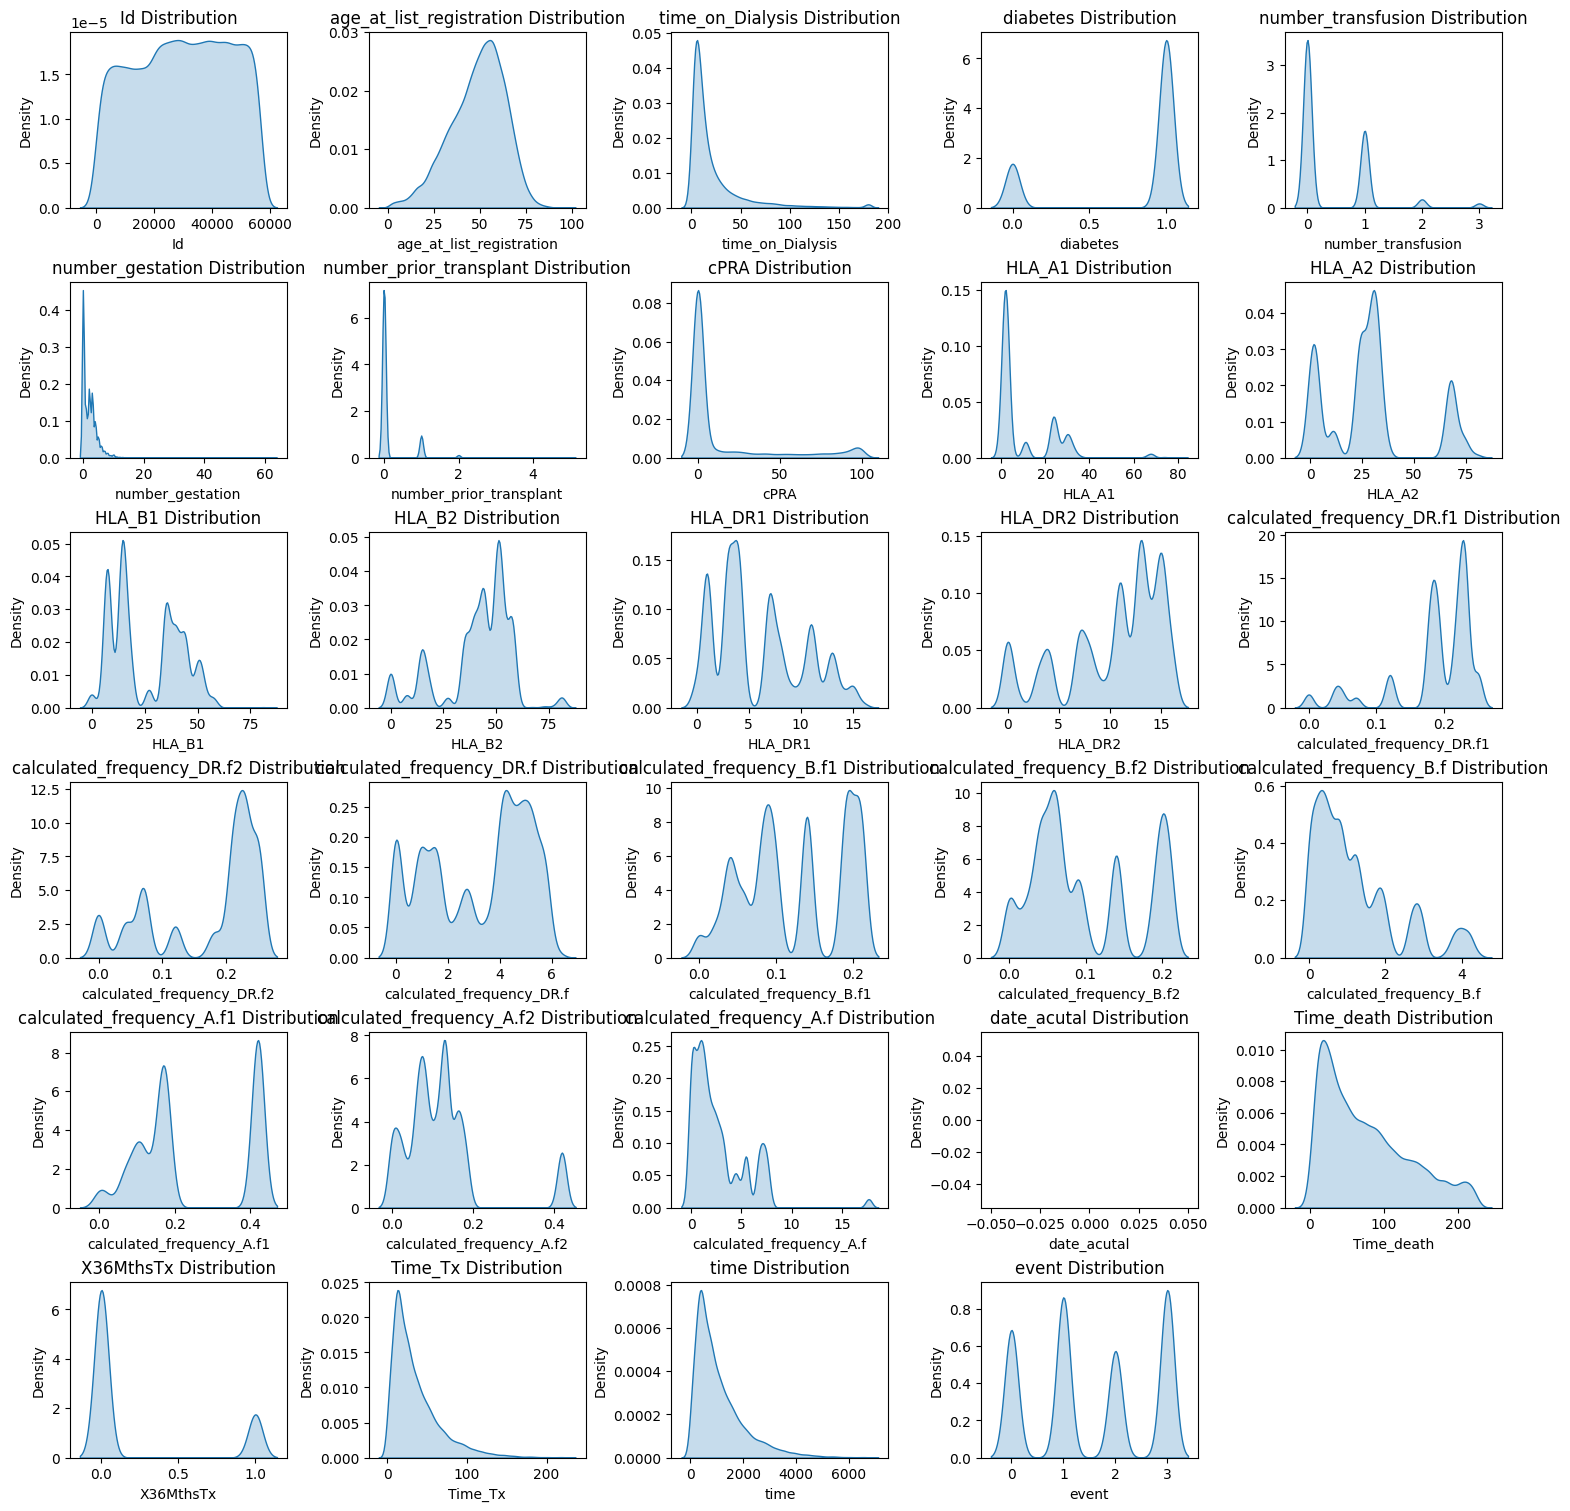

In [37]:
# Set up subplots for numerical and categorical variables
columns = dfraw.select_dtypes(include='number').columns
# Set the size of the plot based on the number of categorical columns
plt.figure(figsize=(15, 15), layout="constrained")

# Loop through each categorical column and create a bar plot
for i, column in enumerate(columns, 1):
    plt.subplot(6, 5, i)
    sns.kdeplot(dfraw[column], label=column, shade=True)
    plt.title(f'{column} Distribution')

plt.show()

Text(0, 0.5, 'number of gestations')

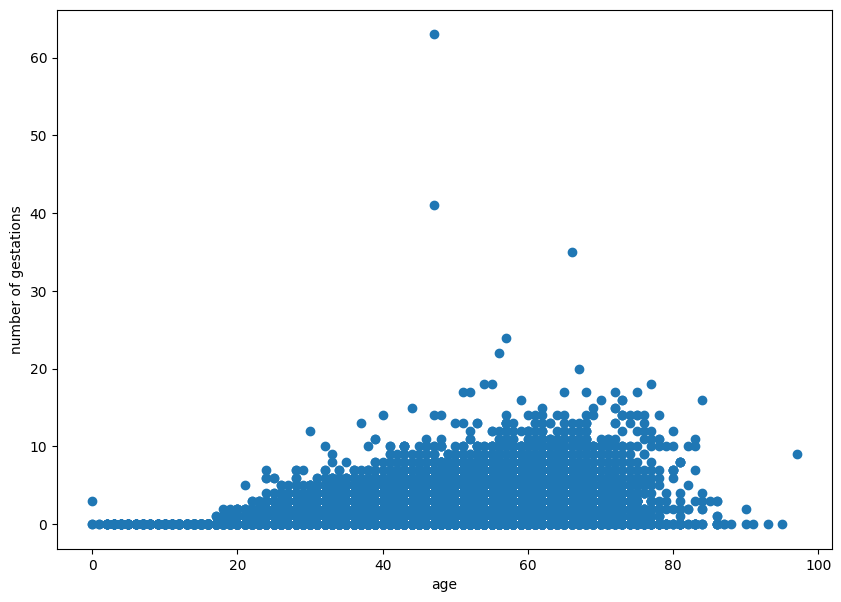

In [41]:
fig, ax = plt.subplots(1,1, figsize = (10,7))

ax.scatter(dfraw["age_at_list_registration"],dfraw["number_gestation"])
ax.set_xlabel("age")
ax.set_ylabel("number of gestations")

In [63]:
# That ouliers spent 75% of her life pregnant, we can doubt it is possible.
dfraw[dfraw["number_gestation"]==63]
print('percentage of time spent pregnant: ',((dfraw[dfraw["number_gestation"]==63]["number_gestation"].values[0]*9)/(dfraw[dfraw["number_gestation"]==63]["age_at_list_registration"].values[0]*12)*100).round(3),'%')

percentage of time spent pregnant:  100.532 %


Checking if any pattern can be observed to fill Nas

In [11]:
testna = dfraw[dfraw[['agHBs', 'anti.HCV', 'chagas']].isna().any(axis=1)]


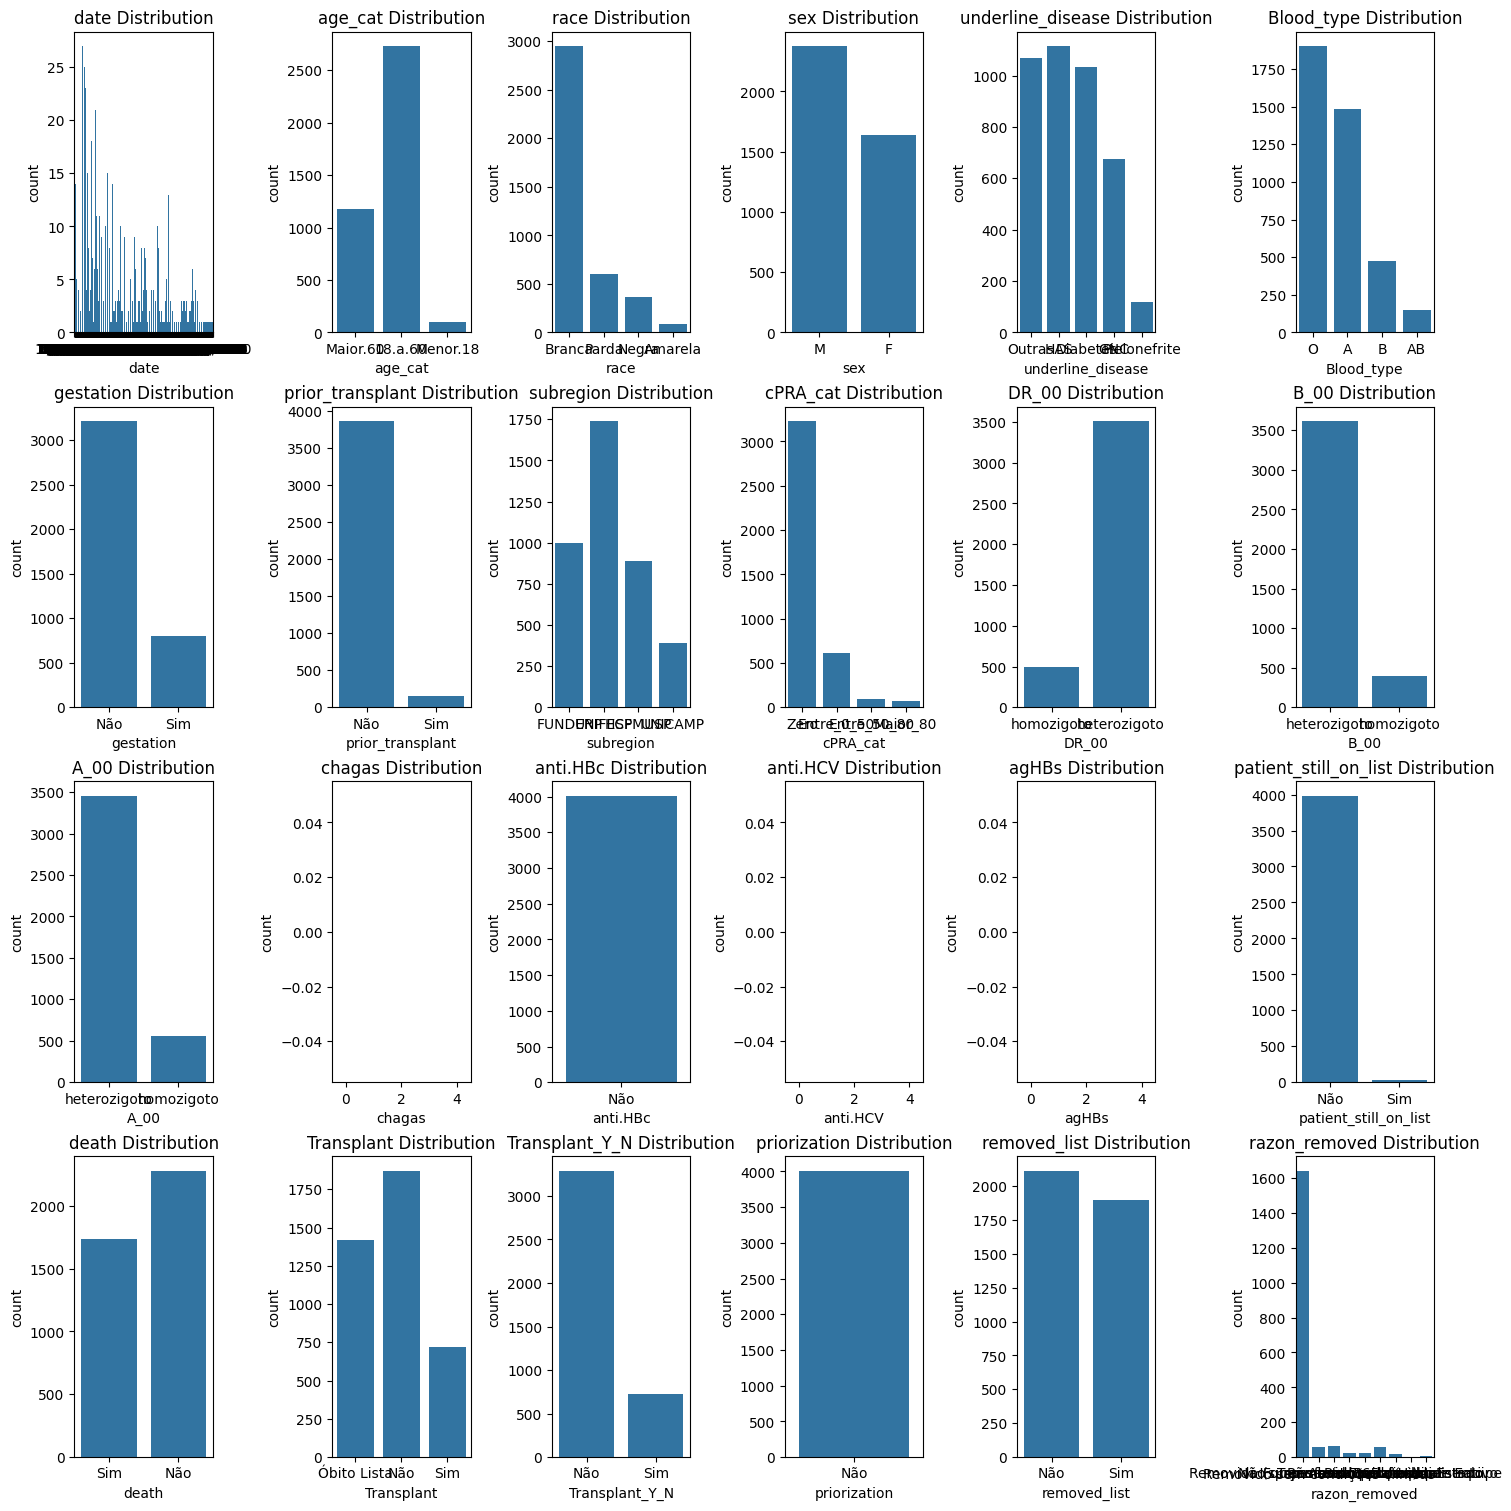

In [19]:
# Get the list of categorical columns
categorical_columns = testna.select_dtypes(include=['object']).columns

# Set the size of the plot based on the number of categorical columns
plt.figure(figsize=(15, 15), layout="constrained")

# Loop through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, len(categorical_columns)//4, i)
    sns.countplot(x=column, data=testna)
    plt.title(f'{column} Distribution')

plt.show()

Checking if some columns are really corresponding

In [21]:
dfraw[dfraw["Transplant_Y_N"] == "Sim"].shape[0] == dfraw[dfraw["event"] == 1].shape[0]

13732